In [50]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [51]:
# reading the csv file and printing head of the dataframe
file_path = 'Uber Request Data.csv'
uber = pd.read_csv(file_path)
uber.head() 

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [52]:
uber.drop_duplicates(inplace = True) # droping the duplcated rows any if any

In [53]:
## confirming that no duplicated rows are present the dataframe

uber.duplicated().sum() 

0

In [54]:
# lets see the shape of the dataframe
uber.shape

(6745, 6)

In [55]:
# lets see the columns and their datatypes
uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 368.9+ KB


In [56]:
# chceking the number of nulls in the each column of the dataframe

uber.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [57]:
#lets look at the pecentage of null values 
uber.isna().mean()*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

There are two columns with null values 

1. Driver id
2. Drop timestamp

***Lets check any specific reason behind the coulmn values being null***

In [58]:
# Getting the 'Driver id' column and obsevering the status values 

uber[uber['Driver id'].isnull()]['Status'].value_counts()

No Cars Available    2650
Name: Status, dtype: int64

In [59]:
# Getting the 'Drop timestamp' column and obsevering the status values 

uber[uber['Drop timestamp'].isnull()]['Status'].value_counts()

No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

Inference on Column Null - Values

1. Driver id - 2650 Nulls
2. Drop timestamp - 3914 Nulls

The null values in Above mentioned columns are valid : - as the status value of these rows is being either the "No Cars available" or "cancelled"
Hence they dont need to be imputed and these rows are carrying specific meaning with nulls values in those columns.

**The Missing-type Identified : MNAR ( Missing Not At Random )**

**Correction of the datatypes**

We will do the following datatype corrections

1. Request id  - int to object
2. Driver id - float to object
3. Request timestamp - object to datetime
4. Drop Timestamp - object to datatime

In [60]:
uber.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [61]:
# converting the request id from integer to object, since no numerical caluculations are expected out of this column

uber['Request id'] = uber['Request id'].astype('str')
uber['Request id'].head(3)

0     619
1     867
2    1807
Name: Request id, dtype: object

In [62]:
# converting the Driver id from float to object, since no numerical caluculations are expected out of this column

uber['Driver id'] = uber['Driver id'].apply(lambda x : str(int(x)) if np.isnan(x) == False else np.nan)
uber['Driver id'].head(3)

0    1
1    1
2    1
Name: Driver id, dtype: object

In [63]:
# converting the request timestamp from object type to proper timestamp format

uber['Request timestamp'] = uber['Request timestamp'].str.replace('/','-')
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'], dayfirst = True)
uber['Request timestamp'].head(3)

0   2016-07-11 11:51:00
1   2016-07-11 17:57:00
2   2016-07-12 09:17:00
Name: Request timestamp, dtype: datetime64[ns]

In [64]:
# converting the Drop timestamp from object type to proper timestamp format
uber['Drop timestamp'] = uber['Drop timestamp'].str.replace('/','-')
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'], dayfirst = True)
uber['Drop timestamp'].head(3)

0   2016-07-11 13:00:00
1   2016-07-11 18:47:00
2   2016-07-12 09:58:00
Name: Drop timestamp, dtype: datetime64[ns]

In [65]:
# lets check the timestamp conversion 
print('unique years involved : ',uber['Request timestamp'].dt.year.unique().tolist())
print('unique months involved : ',uber['Request timestamp'].dt.month.unique().tolist())
print('unique days involved : ',uber['Request timestamp'].dt.day.unique().tolist())

unique years involved :  [2016]
unique months involved :  [7]
unique days involved :  [11, 12, 13, 14, 15]


**Inference from request timestamp :**

The given data is ranging over 11th July to 15th July in the year of 2016

In [66]:
uber.dtypes # checkig the datatypes of all the columns again

Request id                   object
Pickup point                 object
Driver id                    object
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

**Lets extract the required addional columns from the existing dataframe**

We will extract the following information from the existing dataframe

1. Request Day
2. Request Hour

In [67]:
# Extracting the day from the request timestamp

uber['req_day'] = uber['Request timestamp'].dt.day.astype(int)
uber['req_day'].value_counts()

15    1381
11    1367
14    1353
13    1337
12    1307
Name: req_day, dtype: int64

In [68]:
# Extracting the hour from the request timestamp

uber['req_hour'] = uber['Request timestamp'].dt.hour.astype(int)
uber['req_hour'].value_counts()

18    510
20    492
19    473
21    449
5     445
9     431
8     423
17    418
7     406
6     398
22    304
10    243
4     203
23    194
12    184
11    171
15    171
13    160
16    159
14    136
2      99
0      99
3      92
1      85
Name: req_hour, dtype: int64

In [69]:
uber.head() # lets have a look at the dataframe now

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_day,req_hour
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,11,17
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,12,9
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,12,21
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8


**Lets undestand the trend of the status with respect to the hours of the day**

<Figure size 720x288 with 0 Axes>

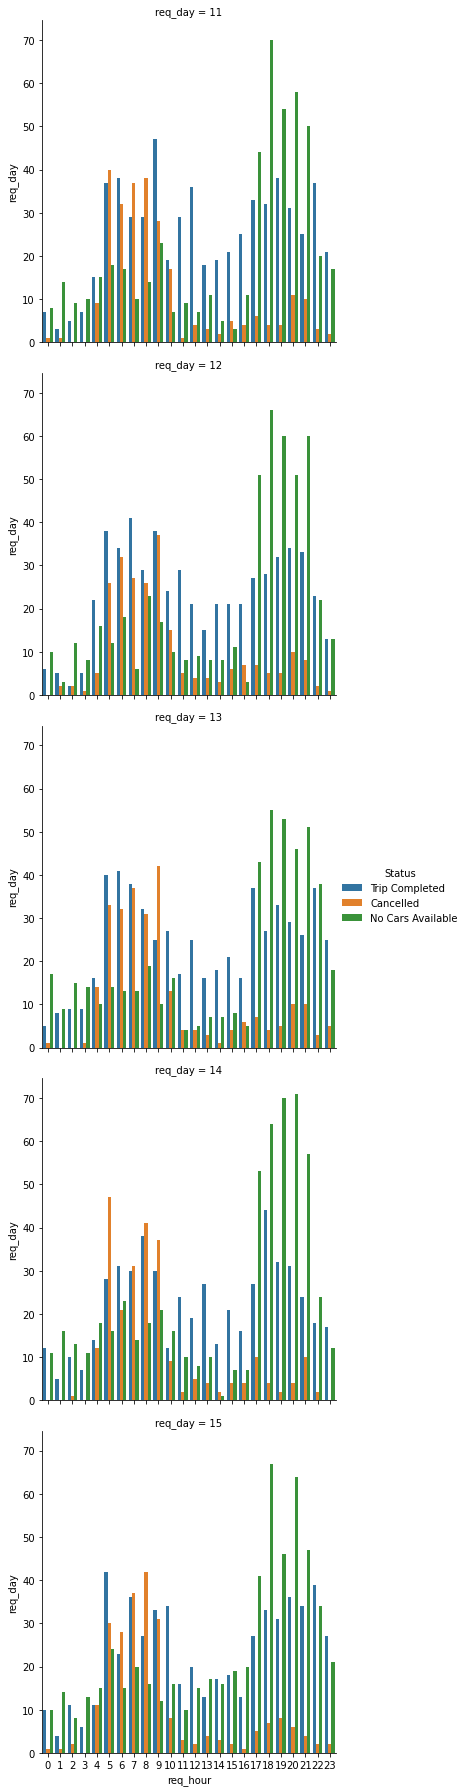

In [70]:
# lets plot in the factor plot with heue = 'Status' so that we can underand the trend with respct to the day also

plt.figure(figsize = [10,4])
sns.factorplot(data = uber, x = 'req_hour',y = 'req_day', kind = 'bar', row = 'req_day', estimator = np.size, hue = 'Status')
plt.show()

<Figure size 720x288 with 0 Axes>

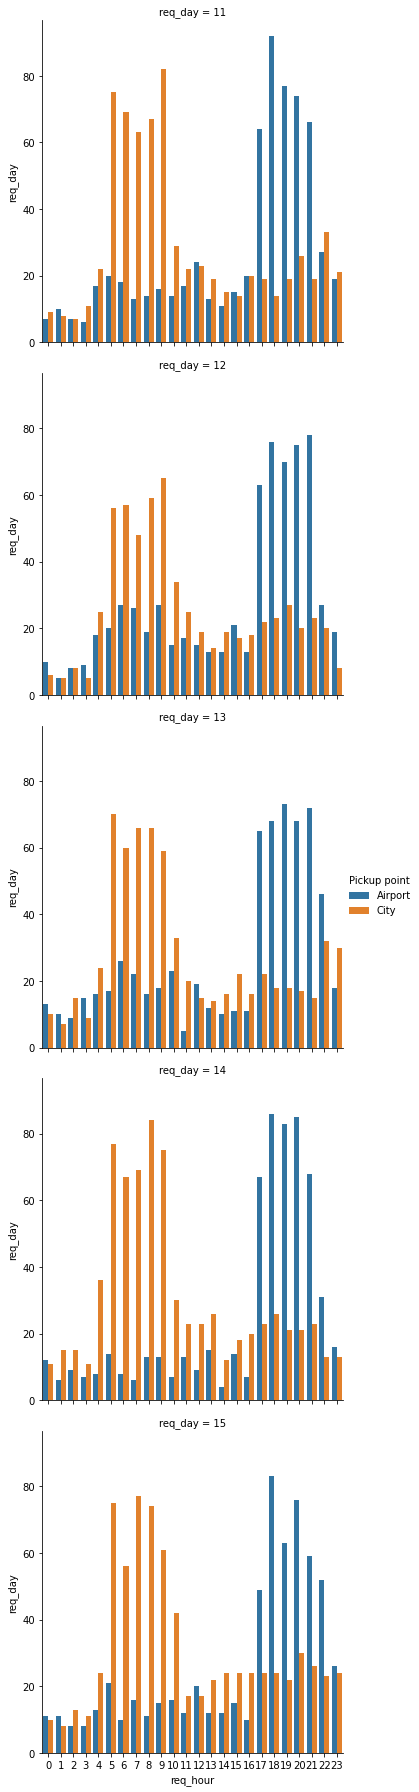

In [71]:
# lets plot in the factor plot with hue = 'Pickup Point' so that we can underand the trend with respct to day

plt.figure(figsize = [10,4])
sns.factorplot(data = uber, x = 'req_hour',y = 'req_day', kind = 'bar', row = 'req_day', estimator = np.size, hue = 'Pickup point')
plt.show()

**Lets aggregate the counts of the total request made in each hour of the day at different pickup points**

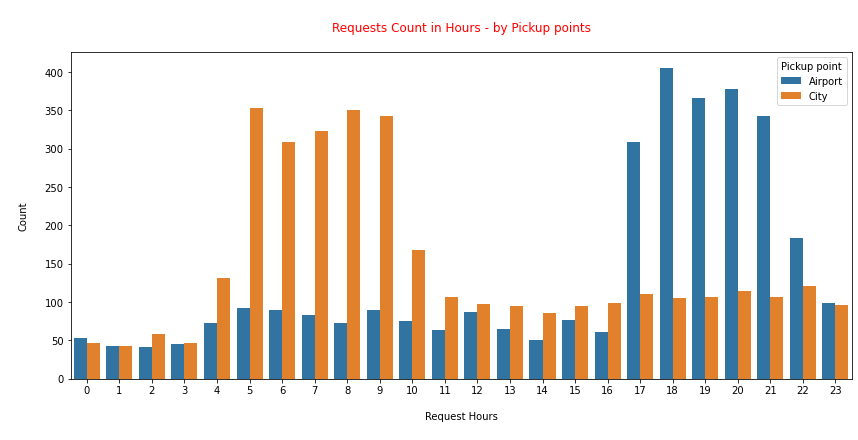

In [72]:
plt.figure(figsize = [14,6])
plt.title('\nRequests Count in Hours - by Pickup points\n', color = 'red') # modifying the title of the plot

sns.countplot(data = uber, x = 'req_hour', hue = 'Pickup point') # plotting the count plot with seaborn

plt.xlabel('\nRequest Hours\n') # modifing the xlabel of the plot
plt.ylabel('\nCount\n') # modifiying the ylabel of the plot

plt.show()

**Inference :**

1. City receives the high numbers of request between 5.00 Hrs and 10.00 Hrs of the Day ( Approx. 300 request / hour ) 
2. Airport gets high number request between 17.00 Hrs and 22.00 Hrs ( Approx 350 request / hour )

**Inorder to have better understanding of diffrent phases of the day, lets bin the 'req_hours' column into different time slots**

1. Pre_Morning - Before 5.00 Hrs
2. Morning_Rush - From 5.00 Hrs to 10.00 Hrs
3. Day_Time - From 10.00 Hrs to 17.00 Hrs
4. Evening_Rush From 17.00 Hrs to 22.00 Hrs
5. Late_Night - From 22.00 Hrs to 0.00 Hrs

In [73]:
# lets define a function for binning the time slots

def timeslot_func(x):
    
    if x < 5 :
        return ('Pre_Morning')
    elif x < 10:
        return ('Morning_Rush')
    elif x < 17:
        return ('Day_Time')
    elif x < 22 :
        return ('Evening_Rush')
    else :
        return ('Late_Night')

In [74]:
# applying the timeslot_func function to the req_hour variable for creating a new column in the dataframe ('timeslot')

uber['timeslot'] = uber['req_hour'].apply(lambda x : timeslot_func(x)) # applying the user defined function for binning
uber['timeslot'].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: timeslot, dtype: int64

In [75]:
# lets look at the count and distribution of the 'time slot' variable and print it in a dataframe format

a = uber['timeslot'].value_counts(normalize = True).index
b = uber['timeslot'].value_counts().values
c = uber['timeslot'].value_counts(normalize = True).values.round(4)*100
pd.DataFrame({'TimeSlots':a,'# Requests':b,'% Distribution':c})

,TimeSlots,# Requests,% Distribution
0,Evening_Rush,2342,34.72
1,Morning_Rush,2103,31.18
2,Day_Time,1224,18.15
3,Pre_Morning,578,8.57
4,Late_Night,498,7.38


**Inference**

1. Almost 65% of the request are coming in, during Evening_Rush and Morning_Rush Time Slots put together

**Let us plot the count of the timeslots with respect to the status : - inorder to get to a deaper undrestanding of the problem**

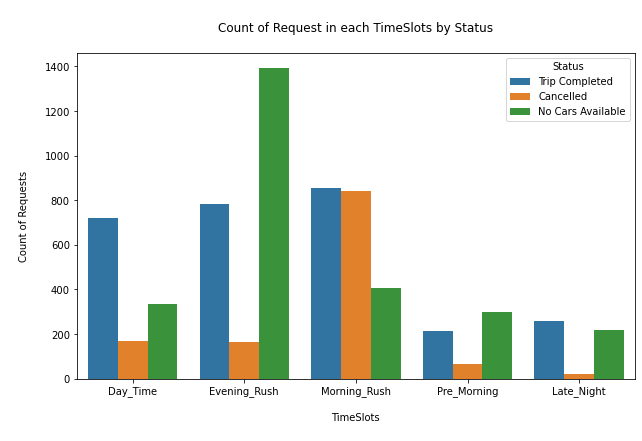

In [76]:
plt.figure(figsize = [10,6])
plt.title('\nCount of Request in each TimeSlots by Status\n')

sns.countplot(data = uber, x = 'timeslot', hue = 'Status') # ploting the count plot using the seaborn library

plt.xlabel('\nTimeSlots\n')
plt.ylabel('\nCount of Requests\n')
plt.show()

**Inference :**

1. The Cancellations are very high during the Morning Rush Time Slot
2. The number of cancellations is as equal as the number of trips completed during the morning rush 
3. The availability of cars is a concern during the Evening rush - almost twice of the request are left unattended to the number of completed requests


**Lets analyis the supply-demand during the Morning-Rush hours with respect to the pick up points**

In [77]:
plot_data = uber[uber['timeslot'] == 'Morning_Rush'] # subsetting the dataframe for the morning_Rush alone

In [78]:
# lets look at the count and distribution of the 'pickup point' variable and print it in a dataframe format for the given condition

a = plot_data['Pickup point'].value_counts().index
b = plot_data['Pickup point'].value_counts().values
c = plot_data['Pickup point'].value_counts(normalize = True).values.round(4)*100
pd.DataFrame({'Pickup Point':a,'# Requests':b,'% Distribution':c})

,Pickup Point,# Requests,% Distribution
0,City,1677,79.74
1,Airport,426,20.26


**Inference**

1. Near to 80 % of the request made during the Morning_Rush is happening at the City alone

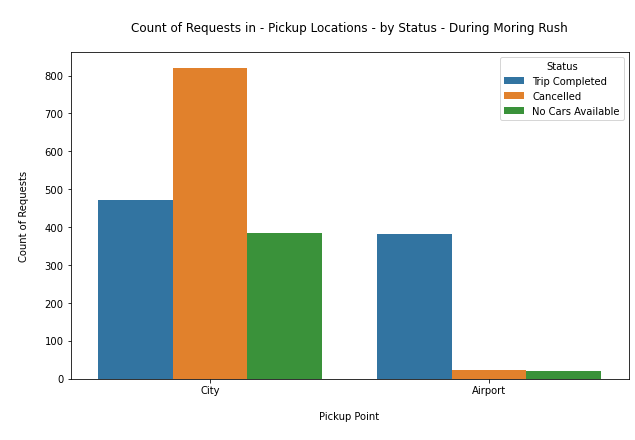

In [79]:
## Lets plot the count request for of pickup points by status with timeslot = 'Morning_Rush'

plt.figure(figsize = [10,6])
plt.title('\nCount of Requests in - Pickup Locations - by Status - During Moring Rush\n')

sns.countplot(data = plot_data, x = 'Pickup point', hue = 'Status') # ploting the coutplot using the seaborn library

plt.xlabel('\nPickup Point\n')
plt.ylabel('\nCount of Requests\n')
plt.show()

**Inferences :**

1. The number of cancellations is relatively very high in the morning rush from the City
2. The car unavailability is also a concern , which is near to the number trips completed during the morning rush

**Lets look at the numbers of cancelled trips from City during the morning hours**

In [80]:
filter_bool_series = (uber['timeslot'] == 'Morning_Rush') & (uber['Status'] == 'Cancelled') & (uber['Pickup point'] == 'City') # creating the filter series

num = filter_bool_series.sum() # summing up boolean series which will be eqaul to the length the filtered dataframe based on the above conditions

print('\nNumber of cancelled trips from city during the morning rush :', num) # printing the number


Number of cancelled trips from city during the morning rush : 820


**Lets look at the numbers of supply met the demand during the Morning_Rush hours from city**

In [81]:
filter_bool_series = (uber['timeslot'] == 'Morning_Rush') & (uber['Status'] == 'Trip Completed') & (uber['Pickup point'] == 'City') # creating the filter series

num = filter_bool_series.sum() # summing up boolean series which will be eqaul to the length the filtered dataframe based on the above conditions

print('\nNumber of Completed trips from city during the morning rush :', num) # printing the number


Number of Completed trips from city during the morning rush : 472


**Lets look at the counts by the status - during the Morning_Rush hours with pickup point == 'City'**

In [82]:
## Total request made in City during the Morning_Rush

filter_bool_series = ((uber['timeslot'] == 'Morning_Rush') & (uber['Pickup point'] == 'City'))
num = filter_bool_series.sum()
print('The total number of request made during the Morning_Rush in the City : ',num)

The total number of request made during the Morning_Rush in the City :  1677


In [83]:
# Count of status aginst request with pick up point = 'City' & Time Slot = 'Morning_Rush'

uber_morn_city = uber[(uber['timeslot'] == 'Morning_Rush') & (uber['Pickup point'] == 'City')]
uber_morn_city['Status'].value_counts()

Cancelled            820
Trip Completed       472
No Cars Available    385
Name: Status, dtype: int64

In [84]:
# lets look at the count and distribution of the 'Status' variable and print it in a dataframe format for the given condition

a = uber_morn_city['Status'].value_counts().index
b = uber_morn_city['Status'].value_counts().values
c = uber_morn_city['Status'].value_counts(normalize = True).values.round(4)*100
pd.DataFrame({'Status':a,'Count':b,'% Distribution':c})

,Status,Count,% Distribution
0,Cancelled,820,48.90
1,Trip Completed,472,28.15
2,No Cars Available,385,22.96


**Inference**

1. Almost 49% of the request are getting cancelled in the morning_Rush from the City

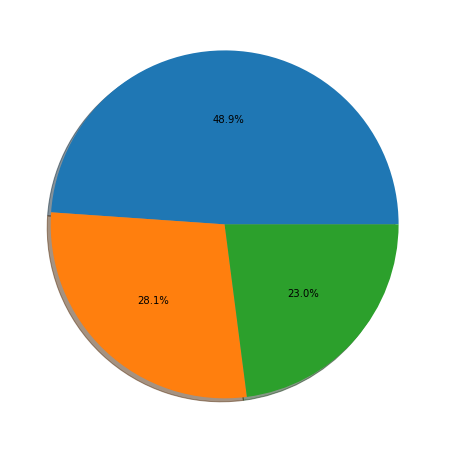

In [85]:
## Lets plot the distibution of each status values (City, Morning_Rush) in pie plot

plt.figure(figsize = [8,8])

plot_data = uber_morn_city['Status'].value_counts(normalize = True)

plt.pie(plot_data, autopct = '%1.1f%%', shadow = True)

plt.show()

**Inference:**

1. Almost 49% of the request are getting cancelled in the morning_Rush from the City
2. 23% of the request are getting un-attended, due to the non-availability of the cars in the morning hours from the City
3. Only 28% of request is able to get through, is a matter of concern - from the city during the morning rush

**Lets look at the supply-demand during the Evening-Rush hours with respect to the pick up points**

In [86]:
plot_data = uber[uber['timeslot'] == 'Evening_Rush'] # creating the subset of the dataframe for Timeslot = "Evening_Rush"

In [87]:
# lets look at the count and distribution of the 'Pickup point' variable and print it in a dataframe format for the given condition

a = plot_data['Pickup point'].value_counts().index
b = plot_data['Pickup point'].value_counts().values
c = plot_data['Pickup point'].value_counts(normalize = True).values.round(4)*100
pd.DataFrame({'Pickup Point':a,'#Requests':b,'% Distribution':c})

,Pickup Point,#Requests,% Distribution
0,Airport,1800,76.86
1,City,542,23.14


**Inference**

1. Near to 77 % of the request during the Evening_Rush is happening from the Airport alone.That is a huge demand.

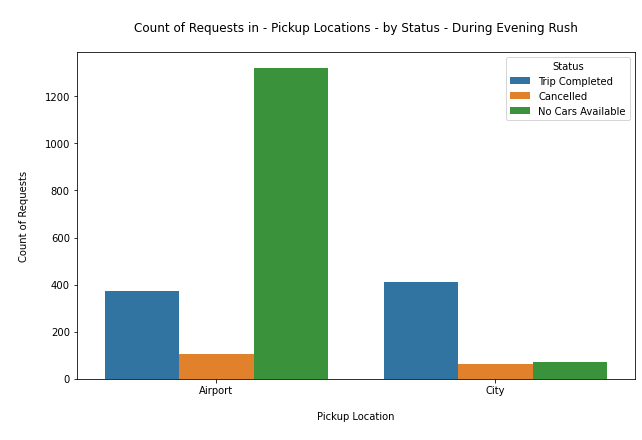

In [88]:
## Lets plot the count request for of pickup points by status with timeslot = 'Evening_Rush'

plt.figure(figsize = [10,6])
plt.title('\nCount of Requests in - Pickup Locations - by Status - During Evening Rush\n')

sns.countplot(data = plot_data, x = 'Pickup point', hue = 'Status') #plotting the countplot using seaborn

plt.xlabel('\nPickup Location\n')
plt.ylabel('\nCount of Requests\n')
plt.show()

**Inferences:**

1. During the evening hours the availability of cars at the airport is very less
2. The cancellation is relative less in this scenario, as the gap between demand and the supply is very high

**Lets look at the numbers of supply-demand during the Evening_Rush at the city**

In [89]:
filter_bool_series = (uber['timeslot'] == 'Evening_Rush') & (uber['Status'] == 'Trip Completed') & (uber['Pickup point'] == 'City') # creating the filter series

num = filter_bool_series.sum()  # summing up boolean series which will be eqaul to the length the filtered dataframe based on the above conditions

print('\nNumber of completed trips from city during the Evening rush :', num) # printing the number


Number of completed trips from city during the Evening rush : 411


**Lets look at the numbers of supply-demand during the Evening_Rush at the Airport**

In [90]:
filter_bool_series = (uber['timeslot'] == 'Evening_Rush') & (uber['Status'] == 'Trip Completed') & (uber['Pickup point'] == 'Airport') # creating the filter series

num = filter_bool_series.sum() # summing up boolean series which will be eqaul to the length the filtered dataframe based on the above conditions

print('\nNumber of completed trips from the Airport during the Evening rush :', num) # printing the number


Number of completed trips from the Airport during the Evening rush : 373


**Lets look at the severity of the cars unavalibility of Cars at Airport during the Evening_Rush**

In [91]:
filter_bool_series = (uber['timeslot'] == 'Evening_Rush') & (uber['Status'] == 'No Cars Available') & (uber['Pickup point'] == 'Airport') # creating the filter series

num = filter_bool_series.sum() # summing up boolean series which will be eqaul to the length the filtered dataframe based on the above conditions

print('\nNumber of requests remained unattended from Airport during the Evening rush due to unavialabilty of cars :', num) # printing the number


Number of requests remained unattended from Airport during the Evening rush due to unavialabilty of cars : 1321


**Lets look at the severity requests getting cancelled at Airport during the Evening_Rush**

In [92]:
filter_bool_series = (uber['timeslot'] == 'Evening_Rush') & (uber['Status'] == 'Cancelled') & (uber['Pickup point'] == 'Airport') # creating the filter series

num = filter_bool_series.sum() # summing up boolean series which will be eqaul to the length the filtered dataframe based on the above conditions

print('\nNumber of cancelled Trips from Airport during the Evening rush :', num) # printing the number


Number of cancelled Trips from Airport during the Evening rush : 106


**Lets look at the counts by the status - during the Evening_Rush hours with pickup point == 'Airport'**

In [93]:
## Total request made in Airport during the Evening_Rush

filter_bool_series = ((uber['timeslot'] == 'Evening_Rush') & (uber['Pickup point'] == 'Airport'))
num = filter_bool_series.sum()
print('The total number of request made during the Evening_Rush in the Airport : ',num)

The total number of request made during the Evening_Rush in the Airport :  1800


In [94]:
# Count of status with pick up = 'Airport' & Time Slot = 'Evening Rush'

uber_eve_airport = uber[(uber['timeslot'] == 'Evening_Rush') & (uber['Pickup point'] == 'Airport')]
uber_eve_airport['Status'].value_counts()

No Cars Available    1321
Trip Completed        373
Cancelled             106
Name: Status, dtype: int64

In [95]:
# lets look at the count and distribution of the 'Status variable and print it in a dataframe format for the given condition

a = uber_eve_airport['Status'].value_counts().index
b = uber_eve_airport['Status'].value_counts().values
c = uber_eve_airport['Status'].value_counts(normalize = True).values.round(4)*100
pd.DataFrame({'Status':a,'Count':b,'% Distribution':c})

,Status,Count,% Distribution
0,No Cars Available,1321,73.39
1,Trip Completed,373,20.72
2,Cancelled,106,5.89


**Inference**

1. Almost 73% of the request are getting unattended due to the non-availability of Cars at the Airport during the Evening_Rush hours

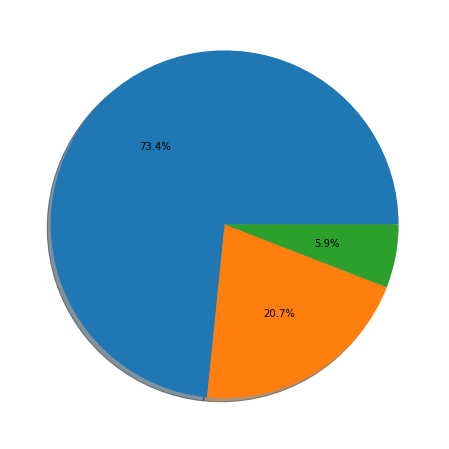

In [96]:
## Lets plot the distibution of each status values (Airport, Evening_Rush) in pie plot

plt.figure(figsize = [8,8])

plot_data = uber_eve_airport['Status'].value_counts(normalize = True)

plt.pie(plot_data, autopct = '%1.1f%%', shadow = True)
plt.show()

**Inference:**

1. Almost 73% of the request are getting unattended due to the non-availability of Cars at the Airport during the Evening_Rush hours
2. Only 6% of the request are getting cancelled, this is because : - the supply is very minimal to the heavy demand at that time
3. Only 21% of request is able to get through, is a matter of concern during the time slot

Putting the two Critical Scenarios Together

1. Morning Rush - City - Cancellation (49%)
1. Evening Rush - Airport - Non avialabilty of Cars (73%)